<a href="https://colab.research.google.com/github/muken1128/machine-learning/blob/main/time-series/time_series002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

参考
https://qiita.com/takuto512/items/49152d3ad5d21b10a41b

Pythonを用いた一般ガウス状態空間モデルによる時系列分析【外因性と季節性を考慮した実装例】

状態空間モデルとは直接観測できない潜在的な状態の存在を仮定したモデルのことである。

データはstatsmodelにあったCO2データを用いる。



In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
import statsmodels.api as sm
import statsmodels.datasets.co2 as co2

In [19]:
co2_raw = co2.load().data

co2_raw = co2_raw[335:]
co2_raw.describe()

,co2
count,1937.000000
mean,343.511461
std,15.610399
min,315.500000
25%,329.400000
50%,342.600000
75%,356.600000
max,373.900000


In [12]:
co2_raw.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq='W-SAT')

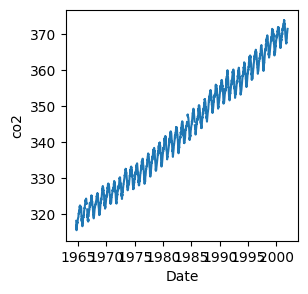

In [24]:


plt.figure(figsize=(3, 3))

plt.ylabel(co2_raw.columns[0])
plt.xlabel("Date")
plt.plot(co2_raw)

Optimization terminated successfully.
         Current function value: 0.642339
         Iterations: 12
         Function evaluations: 44
         Gradient evaluations: 44


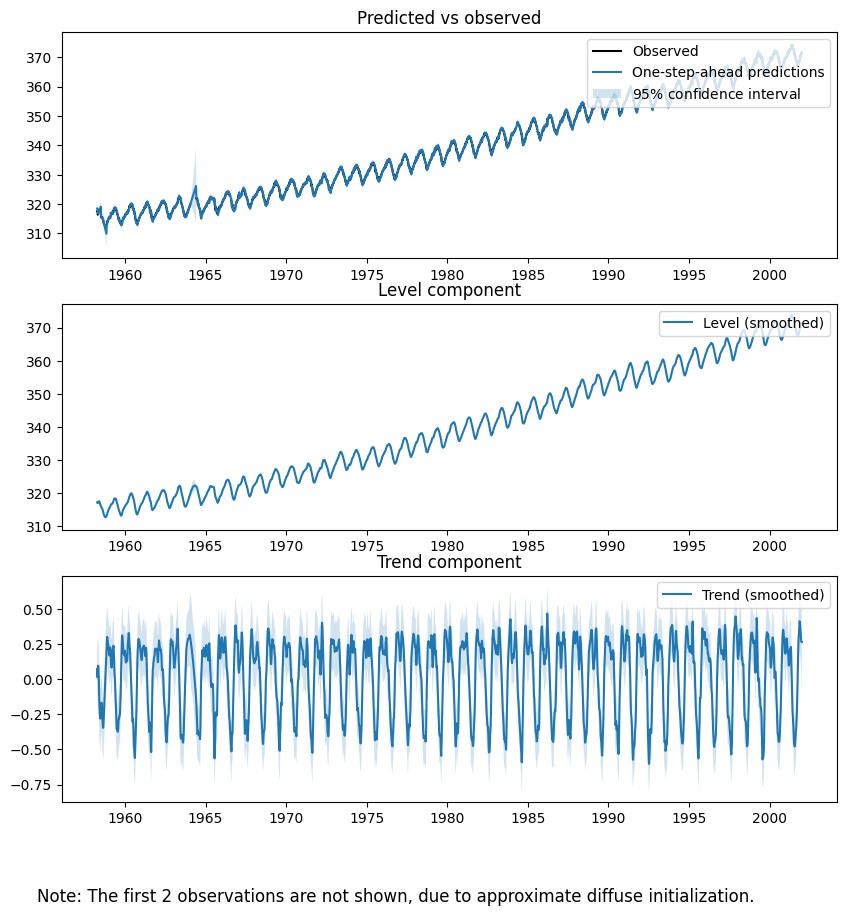

In [15]:
#ローカル線形トレンドモデル
mod_trend = sm.tsa.UnobservedComponents(co2_raw,"local linear trend")
res_trend = mod_trend.fit(method="bfgs")

rcParams["figure.figsize"] = 10,10
fig = res_trend.plot_components()

Optimization terminated successfully.
         Current function value: 0.665441
         Iterations: 22
         Function evaluations: 64
         Gradient evaluations: 64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/structural.py:1738: RuntimeWarning: invalid value encountered in sqrt
  std_errors = np.sqrt(component_bunch['%s_cov' % which])


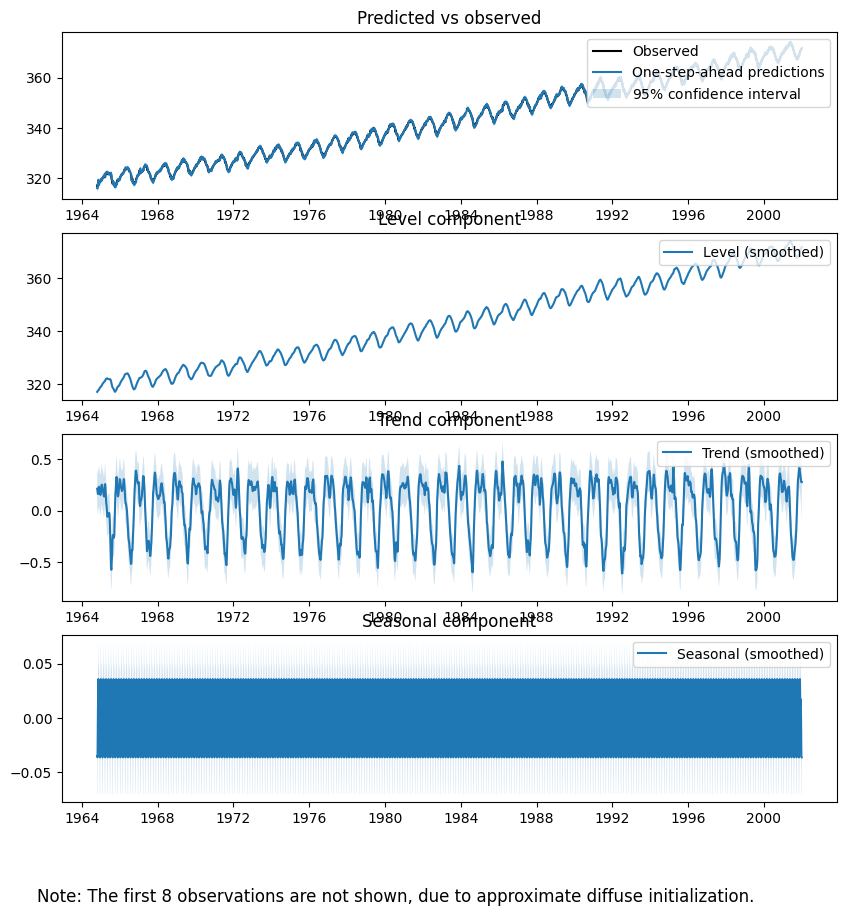

In [25]:
#季節性を入れた，ローカル線形トレンドモデル
mod_season_trend = sm.tsa.UnobservedComponents(co2_raw.co2,
                                              "local linear trend",
                                              seasonal = 7)

res_season_trend = mod_season_trend.fit(
    method='bfgs',
    maxiter=1000,
)

rcParams["figure.figsize"] = 10,10
fig = res_season_trend.plot_components()

In [26]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX


# SARIMAモデルの適用
model = SARIMAX(co2_raw.co2, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # (p,d,q) (P,D,Q,s)
model_fit = model.fit(disp=False)

# 予測
predictions = model_fit.forecast(steps=10)
print(predictions)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2002-01-05    371.644130
2002-01-12    371.726108
2002-01-19    371.902420
2002-01-26    372.005788
2002-02-02    372.133230
2002-02-09    372.194260
2002-02-16    372.337138
2002-02-23    372.384128
2002-03-02    372.410095
2002-03-09    372.515541
Freq: W-SAT, Name: predicted_mean, dtype: float64


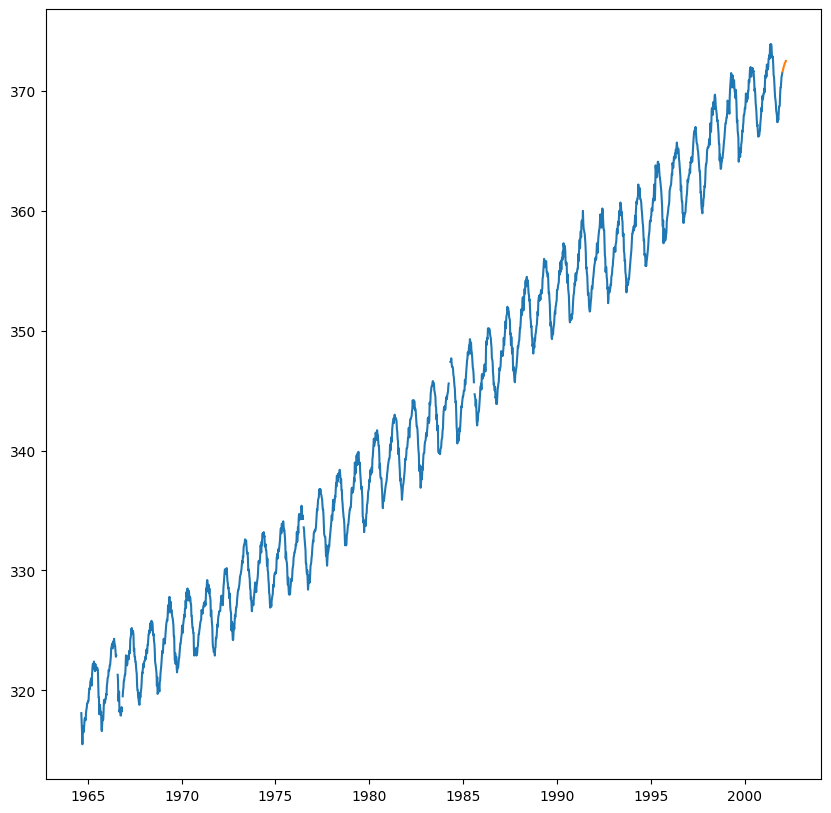

In [28]:
plt.plot(co2_raw)
plt.plot(predictions)